## Задание на лабораторную работу

Реализовать классификацию сортов растения ирис (Iris Setosa - 0, Iris Versicolour - 1, Iris
Virginica - 2) по четырем признакам: размерам пестиков и тычинок его цветков.

## Выполнение работы

Поключаем модули

In [7]:
import pandas
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

Набор данных загружается с помощью библиотеки Pandas. После загрузки данных из файла ```python dataframe = pandas.read_csv("iris.csv", header=None)``` , необходимо разделить столбцы на входные данные (X) и выходные данные (Y).

In [8]:
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

При решении задач многоклассовой классификации хорошей практикой является
преобразование выходных атрибутов из вектора в матрицу к виду представленных ниже.

|Iris-setosa|Iris-versicolor|Iris-verginica|
|-----------|---------------|--------------|
|1|0|0|
|0|1|0|
|0|0|1|

Для этого необходимо использовать функцию *to_categorical()*

In [9]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = to_categorical(encoded_Y)

Далее надо задать базовую архитектуру сети.

In [10]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

Далее нужно подготовить сеть к обучению. Чтобы подготовить сеть к обучению, нужно настроить еще три параметра для этапа
компиляции:
1. **функцию потерь**, которая определяет, как сеть должна оценивать качество своей работы на обучающих данных и, соответственно, как корректировать ее в правильном направлении;
2. **оптимизатор** — механизм, с помощью которого сеть будет обновлять себя, опираясь на наблюдаемые данные и функцию потерь;
3. **метрики для мониторинга на этапах обучения и тестирования** — здесь нас будет интересовать только точность (доля правильно классифицированных изображений).

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Теперь можно начинать обучение сети, для чего в случае использования библиотеки Keras
достаточно вызвать метод fit сети — он пытается адаптировать (fit) модель под обучающие
данные.

In [12]:
f = model.fit(X, dummy_y, epochs=75, batch_size=10, validation_split=0.1)

Epoch 1/75
14/14 [==============================] - 1s 22ms/step - loss: 2.1253 - accuracy: 0.3704 - val_loss: 5.2782 - val_accuracy: 0.0000e+00
Epoch 2/75
14/14 [==============================] - 0s 4ms/step - loss: 1.9730 - accuracy: 0.3704 - val_loss: 4.9578 - val_accuracy: 0.0000e+00
Epoch 3/75
14/14 [==============================] - 0s 5ms/step - loss: 1.8510 - accuracy: 0.3704 - val_loss: 4.7098 - val_accuracy: 0.0000e+00
Epoch 4/75
14/14 [==============================] - 0s 4ms/step - loss: 1.7557 - accuracy: 0.3704 - val_loss: 4.4767 - val_accuracy: 0.0000e+00
Epoch 5/75
14/14 [==============================] - 0s 4ms/step - loss: 1.6813 - accuracy: 0.3704 - val_loss: 4.2336 - val_accuracy: 0.0000e+00
Epoch 6/75
14/14 [==============================] - 0s 5ms/step - loss: 1.6098 - accuracy: 0.3704 - val_loss: 4.0355 - val_accuracy: 0.0000e+00
Epoch 7/75
14/14 [==============================] - 0s 4ms/step - loss: 1.5510 - accuracy: 0.3704 - val_loss: 3.8280 - val_accuracy: 0.

В процессе обучения отображаются четыре величины: потери сети на обучающих данных
и точность сети на обучающих данных, а также потери и точность на данных, не
участвовавших в обучении.

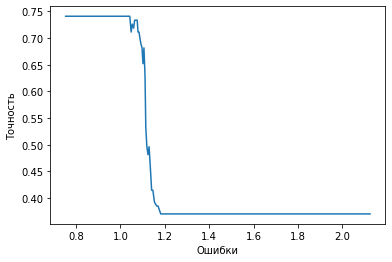

In [17]:
plt.gca().set(xlabel='Ошибки', ylabel='Точность')
plt.plot(f.history['loss'],f.history['accuracy'])